Introduzca intervalo de búsqueda a: 1
Introduzca el intervalo de búsqueda b: 2
Introduzca el valor de xa1.5
Introduzca la cota de error: 0.0001
Introduzca el numero de iteraciones100
[xa ,	 xb , 	 xc , 	 tramo]
[1.5    1.5004 1.3734 0.1266]
[1.3734 1.5    1.3657 0.0076]
[1.3657e+00 1.3734e+00 1.3652e+00 5.0803e-04]
[1.3652e+00 1.3657e+00 1.3652e+00 2.0251e-06]
raiz:  1.3652300139205196


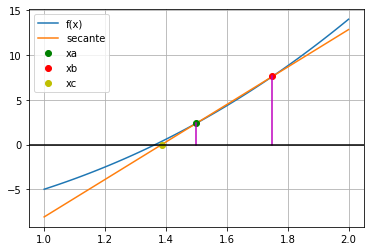

In [2]:
# Algoritmo metodo de la secante 


import numpy as np

def metsecante(fx, xa, cotaerr):
    dx = 4*cotaerr
    xb = xa + dx
    tramo = dx
    tabla = []
    while (tramo>=cotaerr):
        fa = fx(xa)
        fb = fx(xb)
        xc = xa - fa*(xb-xa)/(fb-fa)
        tramo = abs(xc-xa)
        
        tabla.append([xa,xb,xc,tramo])
        xb = xa
        xa = xc

    tabla = np.array(tabla)
    return(tabla)


fx = lambda x: x**3 + 4*x**2 - 10

a = int( input("Introduzca intervalo de búsqueda a: ") )
b = int( input("Introduzca el intervalo de búsqueda b: ") )
xa = float(input("Introduzca el valor de xa"))
cotaerro = float( input("Introduzca la cota de error: ") )
iter = int(input("Introduzca el numero de iteraciones"))


tabla = metsecante(fx,xa,cotaerro)
n = len(tabla)
raiz = tabla[n-1,2]

np.set_printoptions(precision=4)
print('[xa ,\t xb , \t xc , \t tramo]')
for i in range(0,n,1):
    print(tabla[i])
print('raiz: ', raiz)

# Grafica
import matplotlib.pyplot as plt

xi = np.linspace(a,b,iter+1)
fi = fx(xi)
dx = (b-xa)/2
pendiente = (fx(xa+dx)-fx(xa))/(xa+dx-xa)
b0 = fx(xa) - pendiente*xa
tangentei = pendiente*xi+b0

fxa = fx(xa)
xb = xa + dx
fxb = fx(xb)

plt.plot(xi,fi, label='f(x)')

plt.plot(xi,tangentei, label='secante')
plt.plot(xa,fx(xa),'go', label='xa')
plt.plot(xa+dx,fx(xa+dx),'ro', label='xb')
plt.plot((-b0/pendiente),0,'yo', label='xc')

plt.plot([xa,xa],[0,fxa],'m')
plt.plot([xb,xb],[0,fxb],'m')

plt.axhline(0, color='k')
plt.legend()
plt.grid()
plt.show()